In [4]:
#import necessary libraries

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [5]:
# Reading and showing head data
flights = pd.read_csv("62589285_T_ONTIME_MARKETING.csv")
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2018,1,14,7,9E,N279PQ,SYR,DTW,535,nan,...,nan,nan,1,374,nan,nan,nan,nan,nan,nan
1,2018,1,3,3,9E,N8928A,SYR,LGA,1358,1348,...,78,42,1,198,nan,nan,nan,nan,nan,nan
2,2018,1,6,6,9E,N8986B,SYR,LGA,1358,1410,...,93,45,1,198,12,0,12,0,0,nan
3,2018,1,7,7,9E,N8986B,SYR,LGA,1358,1347,...,68,38,1,198,nan,nan,nan,nan,nan,nan
4,2018,1,8,1,9E,N8918B,SYR,LGA,1358,1350,...,79,39,1,198,nan,nan,nan,nan,nan,nan


In [6]:
flights.isnull().values.any()

True

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621461 entries, 0 to 621460
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 621461 non-null  int64  
 1   MONTH                621461 non-null  int64  
 2   DAY_OF_MONTH         621461 non-null  int64  
 3   DAY_OF_WEEK          621461 non-null  int64  
 4   OP_UNIQUE_CARRIER    621461 non-null  object 
 5   TAIL_NUM             618702 non-null  object 
 6   ORIGIN               621461 non-null  object 
 7   DEST                 621461 non-null  object 
 8   CRS_DEP_TIME         621461 non-null  int64  
 9   DEP_TIME             602890 non-null  float64
 10  DEP_DELAY            602399 non-null  float64
 11  TAXI_OUT             601753 non-null  float64
 12  TAXI_IN              601219 non-null  float64
 13  CRS_ARR_TIME         621461 non-null  int64  
 14  ARR_TIME             602080 non-null  float64
 15  ARR_DELAY        

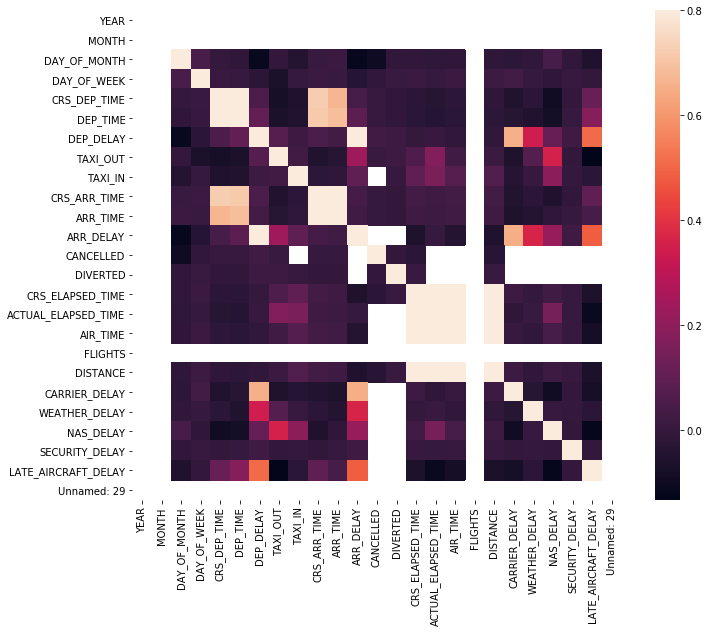

In [8]:
#correlation matrix
corr_mat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);
plt.show()

In [9]:
corr_feat = corr_mat.abs().unstack()
corr_feat.sort_values(ascending = False)

LATE_AIRCRAFT_DELAY  LATE_AIRCRAFT_DELAY     1
SECURITY_DELAY       SECURITY_DELAY          1
WEATHER_DELAY        WEATHER_DELAY           1
CARRIER_DELAY        CARRIER_DELAY           1
DISTANCE             DISTANCE                1
                                            ..
Unnamed: 29          WEATHER_DELAY         nan
                     NAS_DELAY             nan
                     SECURITY_DELAY        nan
                     LATE_AIRCRAFT_DELAY   nan
                     Unnamed: 29           nan
Length: 625, dtype: float64

In [10]:
print ("Rows           =",flights.shape[0])
print ("Columns        =",flights.shape[1])
print ("\nFeatures       =\n  ",flights.columns.to_list())
print ("\nNull Vlaues    =",flights.isnull().sum().values.sum())
print ("\nunique Vlaues  =\n",flights.nunique())

Rows           = 621461
Columns        = 30

Features       =
   ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 29']

Null Vlaues    = 3954283

unique Vlaues  =
 YEAR                      1
MONTH                     1
DAY_OF_MONTH             31
DAY_OF_WEEK               7
OP_UNIQUE_CARRIER        28
TAIL_NUM               5636
ORIGIN                  351
DEST                    351
CRS_DEP_TIME           1216
DEP_TIME               1410
DEP_DELAY              1078
TAXI_OUT                167
TAXI_IN                 128
CRS_ARR_TIME           1339
ARR_TIME               1440
ARR_DELAY              1114
CANCELLED 

In [11]:
def showtable(df):
    '''
    Returns few key metrics of a dataframe.
    '''
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [12]:
showtable(flights)

Dataset Shape: (621461, 30)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,YEAR,int64,0,1,2018,2018,2018,0
1,MONTH,int64,0,1,1,1,1,0
2,DAY_OF_MONTH,int64,0,31,14,3,6,5
3,DAY_OF_WEEK,int64,0,7,7,3,6,3
4,OP_UNIQUE_CARRIER,object,0,28,9E,9E,9E,4
5,TAIL_NUM,object,2759,5636,N279PQ,N8928A,N8986B,12
6,ORIGIN,object,0,351,SYR,SYR,SYR,7
7,DEST,object,0,351,DTW,LGA,LGA,7
8,CRS_DEP_TIME,int64,0,1216,535,1358,1358,9
9,DEP_TIME,float64,18571,1410,NaN,1348,1410,10


## Feature Engineering

In [13]:
## new feature date

In [14]:
flights['DepDate'] = pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY_OF_MONTH,format='%Y%m%d')

In [15]:
flights['DepDate'].head()

0   2018-01-14
1   2018-01-03
2   2018-01-06
3   2018-01-07
4   2018-01-08
Name: DepDate, dtype: datetime64[ns]

In [16]:
flights['ARR_DELAY'].isnull().values.sum()

20604

In [17]:
flights["ARR_DELAY"].unique()

array([ nan, -13.,  24., ..., 879., -76., -87.])

In [18]:
flights["DIVERTED"].unique()

array([0., 1.])

In [19]:
flights["CANCELLED"].unique()

array([1., 0.])

In [20]:
#Status represents wether the flight was :
# on time (0) 
# slightly delayed (1)
# highly delayed (2)
# diverted (3)
# or cancelled (4)

## new feature Status
for record in flights:
    flights.loc[flights['ARR_DELAY'] <= 15 ,"Status"] = 0
    flights.loc[flights['ARR_DELAY'] >= 15 ,"Status"] = 1
    flights.loc[flights['ARR_DELAY'] >= 60 ,"Status"] = 2
    flights.loc[flights['DIVERTED'] == 1 ,"Status"] = 3
    flights.loc[flights['CANCELLED'] == 1 ,"Status"] = 4   

In [21]:
flights["Status"].unique()

array([ 4.,  0.,  1.,  2., nan,  3.])

In [22]:
flights["Status"].isnull().values.sum()

221

#### we combine YEAR , MONTH and DAY_OF_MONTH in unique new feature DepDate
#### ARR_DELAY , DIVERTED and CANCELLED in another unique new feature Status

In [23]:
flights["CANCELLATION_CODE"].unique()

array(['B', nan, 'C', 'A', 'D'], dtype=object)

In [24]:
flights["CANCELLATION_CODE"].isnull().values.sum()

602485

#### CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

In [25]:
#Cancellation cause
flights.loc[flights["CANCELLATION_CODE"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CANCELLATION_CODE"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CANCELLATION_CODE"] =="C", 'CancellationCode'] = "2"
flights.loc[flights["CANCELLATION_CODE"] =="D", 'CancellationCode'] = "3"

In [26]:
## data Cleaning

In [27]:
## Drop unwanted colmuns
flights = flights.drop("Unnamed: 29",1)
flights = flights.drop("YEAR",1) 
flights = flights.drop("DAY_OF_MONTH",1) 
flights = flights.drop("DEP_TIME",1) 
flights = flights.drop("DEP_DELAY",1)
flights = flights.drop("ARR_TIME",1)
flights = flights.drop("CRS_ARR_TIME",1)
flights = flights.drop("ACTUAL_ELAPSED_TIME",1)
flights = flights.drop("CRS_ELAPSED_TIME",1)
flights = flights.drop("DIVERTED",1)
flights = flights.drop("CANCELLED",1)
flights = flights.drop("DISTANCE",1)
flights = flights.drop("FLIGHTS",1)
flights = flights.drop("TAIL_NUM",1)

In [28]:
showtable(flights)

Dataset Shape: (621461, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,7,3,6,3
2,OP_UNIQUE_CARRIER,object,0,28,9E,9E,9E,4
3,ORIGIN,object,0,351,SYR,SYR,SYR,7
4,DEST,object,0,351,DTW,LGA,LGA,7
5,CRS_DEP_TIME,int64,0,1216,535,1358,1358,9
6,TAXI_OUT,float64,19708,167,NaN,22,41,5
7,TAXI_IN,float64,20242,128,NaN,14,7,4
8,ARR_DELAY,float64,20604,1114,NaN,-13,24,7
9,CANCELLATION_CODE,object,602485,4,B,NaN,NaN,1


## Exploratory Data analysis

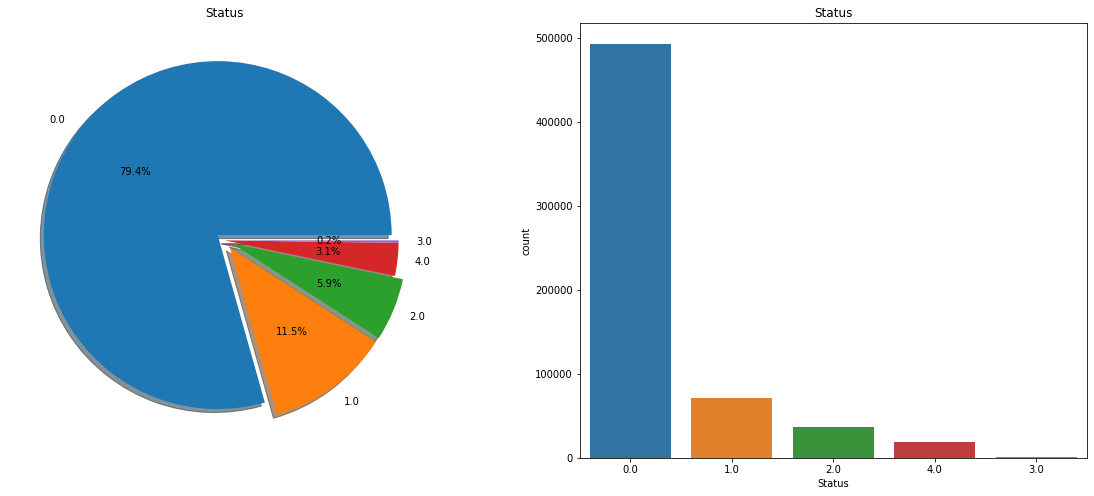

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

In 2018, a 79,4% of flights without delay and 11.5%  were delayed by more than 15 minutes in US.

5,9% of them had delays of more than one hour! 

Another different interpretation is that 0.2% of flights have deverted.

On the other hand, just a 3.1% of flights were cancelled .

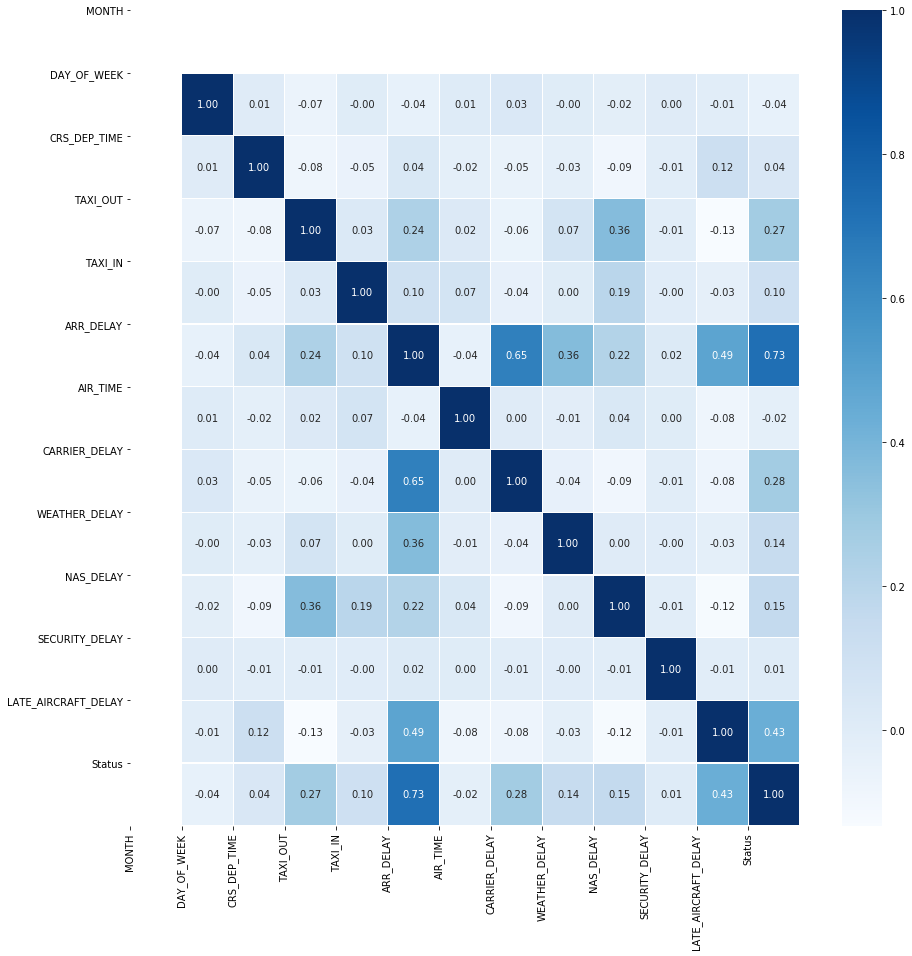

In [30]:
def heatmap(data):
    corr = data.corr()
    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr,cmap="Blues",annot=True,fmt=".2f",linewidths=.2)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show
heatmap(flights)

In [31]:
corr_feat = flights[flights.columns[0:]].corr()["ARR_DELAY"][:]

In [32]:
np.abs(corr_feat).sort_values(ascending=False)[1:]

Status                  1
CARRIER_DELAY           1
LATE_AIRCRAFT_DELAY     0
WEATHER_DELAY           0
TAXI_OUT                0
NAS_DELAY               0
TAXI_IN                 0
AIR_TIME                0
DAY_OF_WEEK             0
CRS_DEP_TIME            0
SECURITY_DELAY          0
MONTH                 nan
Name: ARR_DELAY, dtype: float64

In [33]:
flights.shape

(621461, 19)

In [34]:
data = flights

In [35]:
showtable(data)

Dataset Shape: (621461, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,7,3,6,3
2,OP_UNIQUE_CARRIER,object,0,28,9E,9E,9E,4
3,ORIGIN,object,0,351,SYR,SYR,SYR,7
4,DEST,object,0,351,DTW,LGA,LGA,7
5,CRS_DEP_TIME,int64,0,1216,535,1358,1358,9
6,TAXI_OUT,float64,19708,167,NaN,22,41,5
7,TAXI_IN,float64,20242,128,NaN,14,7,4
8,ARR_DELAY,float64,20604,1114,NaN,-13,24,7
9,CANCELLATION_CODE,object,602485,4,B,NaN,NaN,1


In [36]:
data = data.drop('CancellationCode',axis=1)

In [37]:
showtable(data)

Dataset Shape: (621461, 18)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,7,3,6,3
2,OP_UNIQUE_CARRIER,object,0,28,9E,9E,9E,4
3,ORIGIN,object,0,351,SYR,SYR,SYR,7
4,DEST,object,0,351,DTW,LGA,LGA,7
5,CRS_DEP_TIME,int64,0,1216,535,1358,1358,9
6,TAXI_OUT,float64,19708,167,NaN,22,41,5
7,TAXI_IN,float64,20242,128,NaN,14,7,4
8,ARR_DELAY,float64,20604,1114,NaN,-13,24,7
9,CANCELLATION_CODE,object,602485,4,B,NaN,NaN,1


In [38]:
data = data.drop('CANCELLATION_CODE',axis=1)

In [39]:
data["LATE_AIRCRAFT_DELAY"] = data["LATE_AIRCRAFT_DELAY"].replace("NaN",np.nan)

In [40]:
data = data[data["LATE_AIRCRAFT_DELAY"].notnull()]
data = data.reset_index()[data.columns]

In [41]:
data = data[data["TAXI_OUT"].notnull()]
data = data.reset_index()[data.columns]

In [42]:
showtable(data)

Dataset Shape: (107708, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,6,5,3,3
2,OP_UNIQUE_CARRIER,object,0,27,9E,9E,9E,4
3,ORIGIN,object,0,344,SYR,SYR,SYR,7
4,DEST,object,0,345,LGA,LGA,LGA,7
5,CRS_DEP_TIME,int64,0,1168,1358,1358,1358,9
6,TAXI_OUT,float64,0,166,41,20,11,6
7,TAXI_IN,float64,0,127,7,8,4,4
8,ARR_DELAY,float64,0,947,24,149,63,7
9,AIR_TIME,float64,0,511,45,40,41,8


In [43]:
data.isnull().values.any()

False

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107708 entries, 0 to 107707
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   MONTH                107708 non-null  int64         
 1   DAY_OF_WEEK          107708 non-null  int64         
 2   OP_UNIQUE_CARRIER    107708 non-null  object        
 3   ORIGIN               107708 non-null  object        
 4   DEST                 107708 non-null  object        
 5   CRS_DEP_TIME         107708 non-null  int64         
 6   TAXI_OUT             107708 non-null  float64       
 7   TAXI_IN              107708 non-null  float64       
 8   ARR_DELAY            107708 non-null  float64       
 9   AIR_TIME             107708 non-null  float64       
 10  CARRIER_DELAY        107708 non-null  float64       
 11  WEATHER_DELAY        107708 non-null  float64       
 12  NAS_DELAY            107708 non-null  float64       
 13  SECURITY_DELAY

In [45]:
data.to_csv('flight_delays.csv', index=False)

In [46]:
data = pd.read_csv('flight_delays.csv')

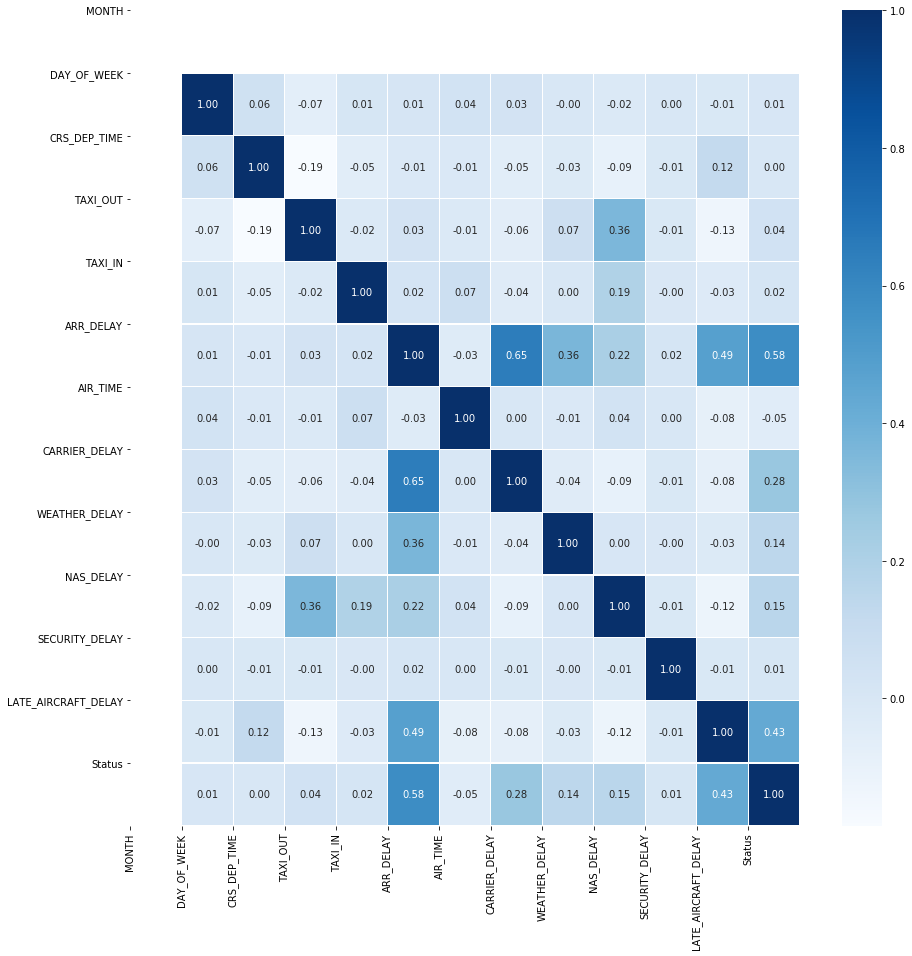

In [47]:
heatmap(data)

In [48]:
corr_features = data[data.columns[0:]].corr()["ARR_DELAY"][:]
np.abs(corr_features).sort_values(ascending=False)[1:]

CARRIER_DELAY           1
Status                  1
LATE_AIRCRAFT_DELAY     0
WEATHER_DELAY           0
NAS_DELAY               0
AIR_TIME                0
TAXI_OUT                0
TAXI_IN                 0
SECURITY_DELAY          0
DAY_OF_WEEK             0
CRS_DEP_TIME            0
MONTH                 nan
Name: ARR_DELAY, dtype: float64

In [49]:
data.dtypes

MONTH                    int64
DAY_OF_WEEK              int64
OP_UNIQUE_CARRIER       object
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
TAXI_OUT               float64
TAXI_IN                float64
ARR_DELAY              float64
AIR_TIME               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
DepDate                 object
Status                 float64
dtype: object

In [50]:
showtable(data)

Dataset Shape: (107708, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,6,5,3,3
2,OP_UNIQUE_CARRIER,object,0,27,9E,9E,9E,4
3,ORIGIN,object,0,344,SYR,SYR,SYR,7
4,DEST,object,0,345,LGA,LGA,LGA,7
5,CRS_DEP_TIME,int64,0,1168,1358,1358,1358,9
6,TAXI_OUT,float64,0,166,41,20,11,6
7,TAXI_IN,float64,0,127,7,8,4,4
8,ARR_DELAY,float64,0,947,24,149,63,7
9,AIR_TIME,float64,0,511,45,40,41,8


In [51]:
#import model libraries
import scipy.stats as st
#from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
#Import module for saving scikit-learn models - Joblib is an alternative to Python's pickle package
from sklearn.externals import joblib

c:\users\ahmad abd elhameed\appdata\local\continuum\anaconda3\envs\deep\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [52]:
Y = data.ARR_DELAY
X = data.drop(['ARR_DELAY'], axis=1)

In [53]:
Cat_cols = ['MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
         'AIR_TIME','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY',
          'DepDate','Status'] # Categorical features
for feat in X[Cat_cols]: # Loop through all columns in the dataframe
    X[feat] = pd.Categorical(X[feat]).codes # Convert to categorical features

#Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=93)

In [54]:
X_train.shape

(75395, 16)

In [55]:
X_test.shape

(32313, 16)

In [59]:
import tensorflow as tf

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [89]:
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
input_shape = X_train.shape[1:]

In [83]:
input_shape

(16,)

# RNN Model here

In [71]:
#model.compile(loss="mean_absolute_error",optimizer='adam',metrics=['accuracy'])

In [72]:
#history = model.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test))

ValueError: Error when checking input: expected simple_rnn_6_input to have 3 dimensions, but got array with shape (75395, 16)

In [54]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [55]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred, normalize=False)

21887

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [59]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_train,Y_train, cv=10)

array([0.99129028, 0.99453415, 0.9892064 , 0.99255175, 0.991415  ,
       0.9914668 , 0.98913074, 0.99396379, 0.99474755, 0.99156493])

In [60]:
df = data.drop(['OP_UNIQUE_CARRIER','ORIGIN','DEST','DepDate'],axis=1)

In [61]:
showtable(df)

Dataset Shape: (107708, 13)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,6,5,3,3
2,CRS_DEP_TIME,int64,0,1168,1358,1358,1358,9
3,TAXI_OUT,float64,0,166,41,20,11,6
4,TAXI_IN,float64,0,127,7,8,4,4
5,ARR_DELAY,float64,0,947,24,149,63,7
6,AIR_TIME,float64,0,511,45,40,41,8
7,CARRIER_DELAY,float64,0,772,12,0,0,4
8,WEATHER_DELAY,float64,0,513,0,0,0,1
9,NAS_DELAY,float64,0,384,12,97,0,4


In [62]:
df.Status.unique()

array([1., 2.])

In [63]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
accuracy_score(Y_test, y_pred)

0.7014823755144988

In [66]:
y_pred[520:550]

array([ 64.,  54.,  62.,  33.,  24.,  69.,  66.,  26., 104., 134.,  37.,
       518.,  28.,  48., 151., 163.,  19.,  33.,  20., 109.,  16.,  59.,
        34.,  41.,  87.,  39.,  24., 155.,  30.,  26.])

In [67]:
X_test[520:550]

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DepDate,Status
25589,0,4,9,84,108,765,57,14,43,20,0,44,0,0,18,1
33791,0,4,18,297,306,996,36,4,58,0,0,0,0,54,4,0
81089,0,1,0,78,236,316,19,4,45,0,0,0,0,62,1,1
43160,0,0,25,188,41,406,11,8,30,33,0,0,0,0,7,0
82954,0,1,5,40,53,402,17,5,59,11,0,0,0,13,8,0
92849,0,0,23,68,41,721,8,7,79,2,0,0,0,67,0,1
4488,0,1,18,297,271,981,31,2,60,60,0,7,0,0,1,1
8400,0,3,23,179,182,646,16,9,32,0,0,1,0,25,17,0
3090,0,4,13,144,172,736,18,41,484,104,0,0,0,0,4,1
64947,0,1,18,327,224,447,15,11,69,0,0,0,0,134,22,1


In [68]:
Y_test[520:550]

25589     64
33791     54
81089     62
43160     33
82954     24
92849     69
4488      67
8400      26
3090     104
64947    134
92785     34
20971    744
21520     28
31282     46
84030    132
5687     164
106218    19
104182    32
83860     20
70714    106
76735     16
3547      59
55979     34
86033     42
33651     92
19704     39
69242     24
107141   156
29102     30
101243    26
Name: ARR_DELAY, dtype: float64

(array([71368.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 36340.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

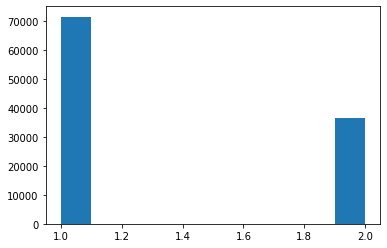

In [69]:
plt.hist(data.Status)

In [70]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve\
,precision_score, recall_score, precision_recall_curve, classification_report, roc_auc_score

In [71]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

        15.0       0.96      0.96      0.96      1085
        16.0       0.95      0.95      0.95      1033
        17.0       0.94      0.95      0.95       958
        18.0       0.95      0.95      0.95       902
        19.0       0.94      0.95      0.95       899
        20.0       0.95      0.92      0.94       769
        21.0       0.94      0.93      0.93       744
        22.0       0.89      0.91      0.90       751
        23.0       0.90      0.89      0.90       714
        24.0       0.88      0.90      0.89       699
        25.0       0.88      0.89      0.88       707
        26.0       0.89      0.89      0.89       635
        27.0       0.86      0.89      0.88       568
        28.0       0.86      0.86      0.86       538
        29.0       0.85      0.84      0.85       552
        30.0       0.81      0.84      0.82       470
        31.0       0.84      0.81      0.82       480
        32.0       0.83    

C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
print(f'Accuracy: {accuracy_score(Y_test, y_pred)}')


Accuracy: 0.7014823755144988


In [73]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
       'ARR_DELAY', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Status'],
      dtype='object')

In [74]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

features = ['MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN',
       'ARR_DELAY', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Status']

df['ARR_DELAY'] = df['ARR_DELAY'].map({'g':0,'h':1})




parameters = {'max_depth':range(3,20)}
dt = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
dt.fit(X=X, y=Y)
tree_model = dt.best_estimator_
print (dt.best_score_, dt.best_params_) 

C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.5417612532842317 {'max_depth': 19}


## Task 1
1- Using January Year 2018 data, apply the Decision Tree method to predict flight delay based on the most important variables, use N-Fold Cross Validation (N >= 20) and Confusion Matrix to evaluate and select best possible model with the shortest possible tree. Provide evidence of variables importance and justify your variables selection. (Code: 25 points - Explanation: 25 points)

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt 

In [76]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=30, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [77]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [78]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, Y_train, sm_tree_depths)

C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 

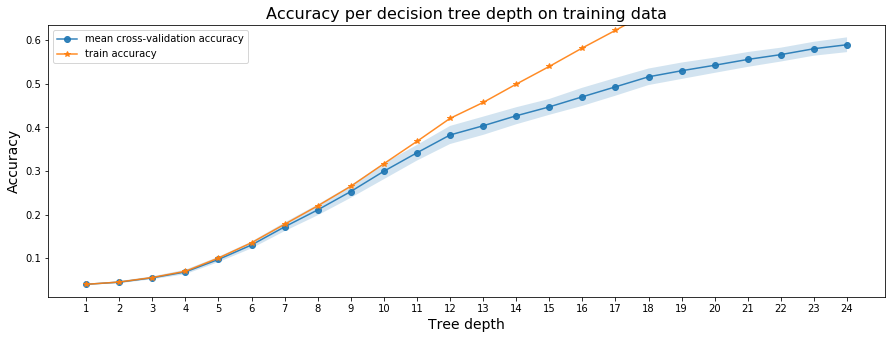

In [79]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [80]:
#print (sm_cv_scores_mean)
#print (sm_cv_scores_std)
print (sm_accuracy_scores)

[0.03981696 0.0450693  0.05545461 0.0697659  0.10019232 0.13526096
 0.17762451 0.21984216 0.26477883 0.31661251 0.3678228  0.42055839
 0.45704622 0.49913124 0.53971749 0.58217388 0.62257444 0.66379733
 0.69478082 0.71770011 0.74157437 0.76124411 0.78178924 0.79738709]


In [81]:
test_accuracy = tree_model.predict(X_test)

In [82]:
accuracy_score(Y_test, test_accuracy)

0.6857302014669019

In [83]:
len(X_test)

32313

In [84]:
proba = tree_model.predict_proba(X_test)

In [85]:
proba[:,1]

array([0.        , 0.11655247, 0.11655247, ..., 0.        , 0.        ,
       0.11655247])

In [86]:
score = tree_model.score(X_test, Y_test)

In [87]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, test_accuracy)

array([[1085,    0,    0, ...,    0,    0,    0],
       [ 490,  543,    0, ...,    0,    0,    0],
       [ 464,    5,  489, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [88]:
X_rfc1, X_rfc2, Y_rfc1, Y_rfc2 = train_test_split(X, Y, test_size=0.1, random_state=93)

In [89]:
X_rfc2.shape

(10771, 16)

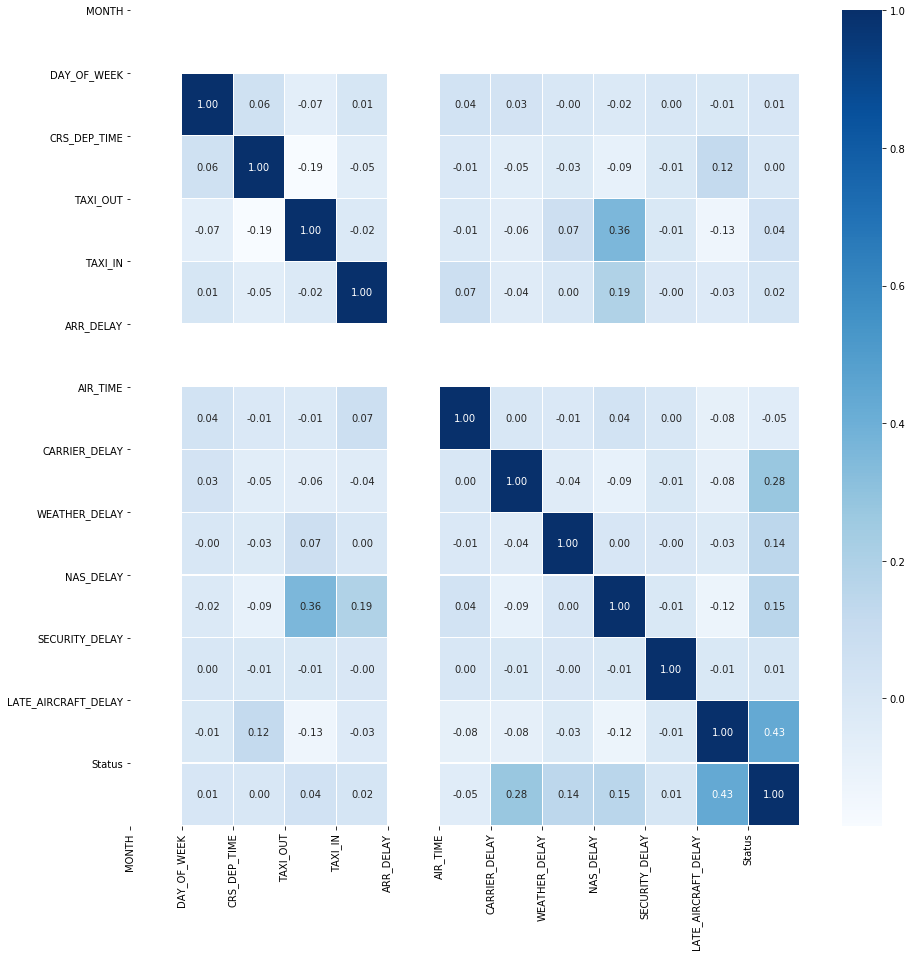

In [90]:
heatmap(df)

Text(0.5, 1.0, 'Top Features derived by Random Forest')

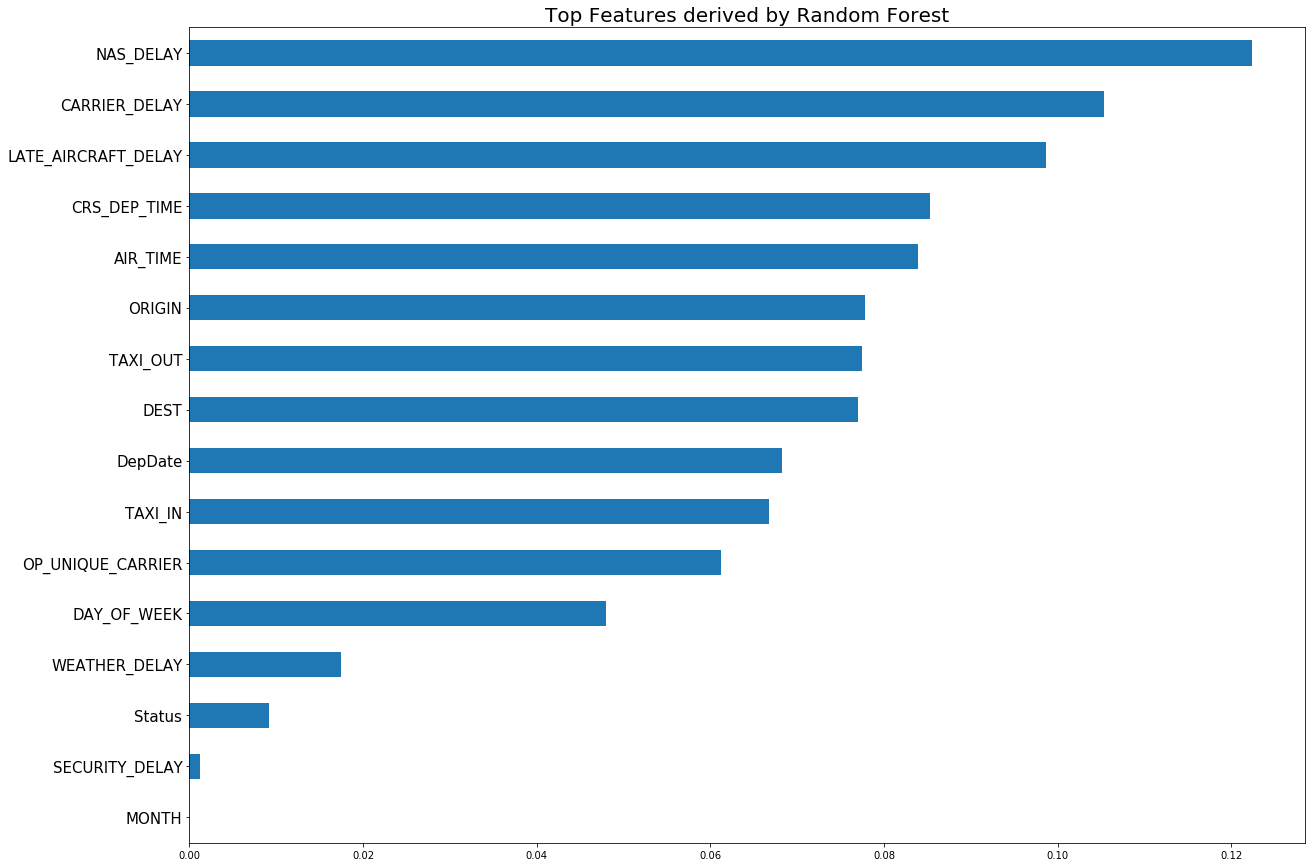

In [91]:
## To look for top features using Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100)

# Train model, note that NO scaling is required
model = rfc.fit(X_rfc2,Y_rfc2)

# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X_rfc2.columns)
   .nlargest(47)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

## Explanation
The correlation matrix identifies three main variables for delays: NAS Delay , Carrier Delay ,and Late Aircraft Delay. 
The graph corroborates this assumption, showing how those three variables create most of delays during the year.
the DecisionTree classifier give us about 70% accuracy which is good and i check the prediction of time ,i found the difference between real and predicted time delay in few minutes execpt the delays which is very big (hours) the classifier could predict it with a low accuracy.


## Task 2
2- Using January Year 2018 data,  apply Random Forests method using Bagging (Number of trees = N as of Task #1) for the same as Task #1. Compare developed model with the best model selected in Task #1. (Code: 15 points - Explanation: 15 points)

In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [94]:
# bagging = BaggingClassifier(RandomForestClassifier(),n_estimators=30,random_state=0)
bagging = BaggingClassifier(SVC(),n_estimators=30,random_state=0)

In [95]:
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=30, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
pred_bagging = bagging.predict(X_test)

## Explanation
the classifier bagging is very bad in this case it take mush ram than i use and tried to work on colab with 35 giga ram and the same error (out of memory) and the program failed.
i couln't run it measure it's performance when using the RandomForestClassifier() as base estimator.
but when use support vecotor machine it took about 8 hours and couldn't predict the result .
the idea about this algorithm is very good and i think it's better than random forest because the fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.
but in our case i think it work well on small data .

## Task 3

In [95]:
# Reading and showing head data
flights_2019 = pd.read_csv("Flights_jan_2019.csv")
flights_2019.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2019,1,11,5,WN,N220WN,1480,MCO,PIT,920,...,135,133,118,834,nan,nan,nan,nan,nan,nan
1,2019,1,11,5,WN,N7889A,2199,MCO,PIT,1420,...,145,138,119,834,nan,nan,nan,nan,nan,nan
2,2019,1,11,5,WN,N764SW,402,MCO,PVD,1300,...,165,153,141,1072,nan,nan,nan,nan,nan,nan
3,2019,1,11,5,WN,N8309C,458,MCO,PVD,2015,...,160,161,144,1072,nan,nan,nan,nan,nan,nan
4,2019,1,11,5,WN,N8686A,1966,MCO,PVD,755,...,160,155,142,1072,nan,nan,nan,nan,nan,nan


In [96]:
flights_2019.isnull().values.any()

True

In [97]:
showtable(flights_2019)

Dataset Shape: (638649, 30)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,YEAR,int64,0,1,2019,2019,2019,0
1,MONTH,int64,0,1,1,1,1,0
2,DAY_OF_MONTH,int64,0,31,11,11,11,5
3,DAY_OF_WEEK,int64,0,7,5,5,5,3
4,OP_UNIQUE_CARRIER,object,0,26,WN,WN,WN,4
5,TAIL_NUM,object,4685,5825,N220WN,N7889A,N764SW,12
6,OP_CARRIER_FL_NUM,int64,0,6880,1480,2199,402,12
7,ORIGIN,object,0,360,MCO,MCO,MCO,7
8,DEST,object,0,360,PIT,PIT,PVD,7
9,CRS_DEP_TIME,int64,0,1243,920,1420,1300,9


In [98]:
flights['WEATHER_DELAY'].isnull().values.sum()

513669

In [99]:
print ("Rows           =",flights_2019.shape[0])
print ("Columns        =",flights_2019.shape[1])
print ("\nFeatures       =\n  ",flights_2019.columns.to_list())
print ("\nNull Vlaues    =",flights_2019.isnull().sum().values.sum())
print ("\nunique Vlaues  =\n",flights_2019.nunique())

Rows           = 638649
Columns        = 30

Features       =
   ['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 29']

Null Vlaues    = 4030441

unique Vlaues  =
 YEAR                      1
MONTH                     1
DAY_OF_MONTH             31
DAY_OF_WEEK               7
OP_UNIQUE_CARRIER        26
TAIL_NUM               5825
OP_CARRIER_FL_NUM      6880
ORIGIN                  360
DEST                    360
CRS_DEP_TIME           1243
DEP_TIME               1438
DEP_DELAY              1046
TAXI_OUT                166
TAXI_IN                 140
CRS_ARR_TIME           1353
ARR_TIME               1440


In [100]:
flights_2019['DepDate'] = pd.to_datetime(flights_2019.YEAR*10000+flights_2019.MONTH*100+flights_2019.DAY_OF_MONTH,format='%Y%m%d')

In [101]:
#Status represents wether the flight was :
# on time (0) 
# slightly delayed (1)
# highly delayed (2)
# diverted (3)
# or cancelled (4)

## new feature Status
for record in flights_2019:
    flights_2019.loc[flights_2019['ARR_DELAY'] <= 15 ,"Status"] = 0
    flights_2019.loc[flights_2019['ARR_DELAY'] >= 15,"Status"] = 1
    flights_2019.loc[flights_2019['ARR_DELAY'] >= 60 ,"Status"] = 2
    flights_2019.loc[flights_2019['DIVERTED'] == 1 ,"Status"] = 3
    flights_2019.loc[flights_2019['CANCELLED'] == 1 ,"Status"] = 4   

In [102]:
flights_2019['CANCELLATION_CODE'].unique()

array([nan, 'B', 'A', 'C', 'D'], dtype=object)

In [103]:
flights_2019["Status"].unique()

array([0., 1., 4., 2., 3.])

In [104]:
flights_2019["CANCELLATION_CODE"].isnull().values.sum()

619099

In [105]:
## Drop unwanted colmuns
flights_2019 = flights_2019.drop("CANCELLATION_CODE",1)
flights_2019 = flights_2019.drop("Unnamed: 29",1)
flights_2019 = flights_2019.drop("YEAR",1) 
flights_2019 = flights_2019.drop("DAY_OF_MONTH",1) 
flights_2019 = flights_2019.drop("DEP_TIME",1) 
flights_2019 = flights_2019.drop("DEP_DELAY",1)
flights_2019 = flights_2019.drop("ARR_TIME",1)
flights_2019 = flights_2019.drop("CRS_ARR_TIME",1)
flights_2019 = flights_2019.drop("ACTUAL_ELAPSED_TIME",1)
flights_2019 = flights_2019.drop("CRS_ELAPSED_TIME",1)
flights_2019 = flights_2019.drop("DIVERTED",1)
flights_2019 = flights_2019.drop("CANCELLED",1)
flights_2019 = flights_2019.drop("DISTANCE",1)
flights_2019 = flights_2019.drop("OP_CARRIER_FL_NUM",1)
flights_2019 = flights_2019.drop("TAIL_NUM",1)

In [106]:
showtable(flights_2019)

Dataset Shape: (638649, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,5,5,5,3
2,OP_UNIQUE_CARRIER,object,0,26,WN,WN,WN,4
3,ORIGIN,object,0,360,MCO,MCO,MCO,7
4,DEST,object,0,360,PIT,PIT,PVD,7
5,CRS_DEP_TIME,int64,0,1243,920,1420,1300,9
6,TAXI_OUT,float64,19396,166,9,14,9,5
7,TAXI_IN,float64,19939,140,6,5,3,4
8,ARR_DELAY,float64,21000,1068,-4,-5,-13,7
9,AIR_TIME,float64,21000,614,118,119,141,8


In [107]:
data_2019 = flights_2019

In [108]:
data_2019["LATE_AIRCRAFT_DELAY"] = data_2019["LATE_AIRCRAFT_DELAY"].replace("NaN",np.nan)
data_2019 = data_2019[data_2019["LATE_AIRCRAFT_DELAY"].notnull()]
data_2019 = data_2019.reset_index()[data_2019.columns]

In [109]:
showtable(data_2019)

Dataset Shape: (117144, 17)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,MONTH,int64,0,1,1,1,1,0
1,DAY_OF_WEEK,int64,0,7,5,5,5,3
2,OP_UNIQUE_CARRIER,object,0,26,WN,WN,WN,4
3,ORIGIN,object,0,359,MCO,MCO,MDW,6
4,DEST,object,0,360,RDU,SDF,ALB,7
5,CRS_DEP_TIME,int64,0,1198,1010,920,2130,9
6,TAXI_OUT,float64,0,164,18,12,6,6
7,TAXI_IN,float64,0,136,2,5,3,4
8,ARR_DELAY,float64,0,973,15,43,19,7
9,AIR_TIME,float64,0,501,77,118,86,8


In [110]:
data_2019.isnull().values.any()

False

In [111]:
data_2019.dtypes

MONTH                           int64
DAY_OF_WEEK                     int64
OP_UNIQUE_CARRIER              object
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                    int64
TAXI_OUT                      float64
TAXI_IN                       float64
ARR_DELAY                     float64
AIR_TIME                      float64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
DepDate                datetime64[ns]
Status                        float64
dtype: object

In [112]:
y_2019 = data_2019.ARR_DELAY
X_2019 = data_2019.drop(['ARR_DELAY'], axis=1)

In [113]:
for feat in X_2019[Cat_cols]: # Loop through all columns in the dataframe
    X_2019[feat] = pd.Categorical(X_2019[feat]).codes # Convert to categorical features

In [114]:
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 93
# Split dataset into 70% train and 30% test
X_train2019, X_test2019, y_train2019, y_test2019 = train_test_split(X_2019, y_2019, test_size=0.3,random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=0.05,random_state=SEED)

In [116]:
model = rf.fit(X_test2019,y_test2019)

Text(0.5, 1.0, 'Top Features derived by Random Forest')

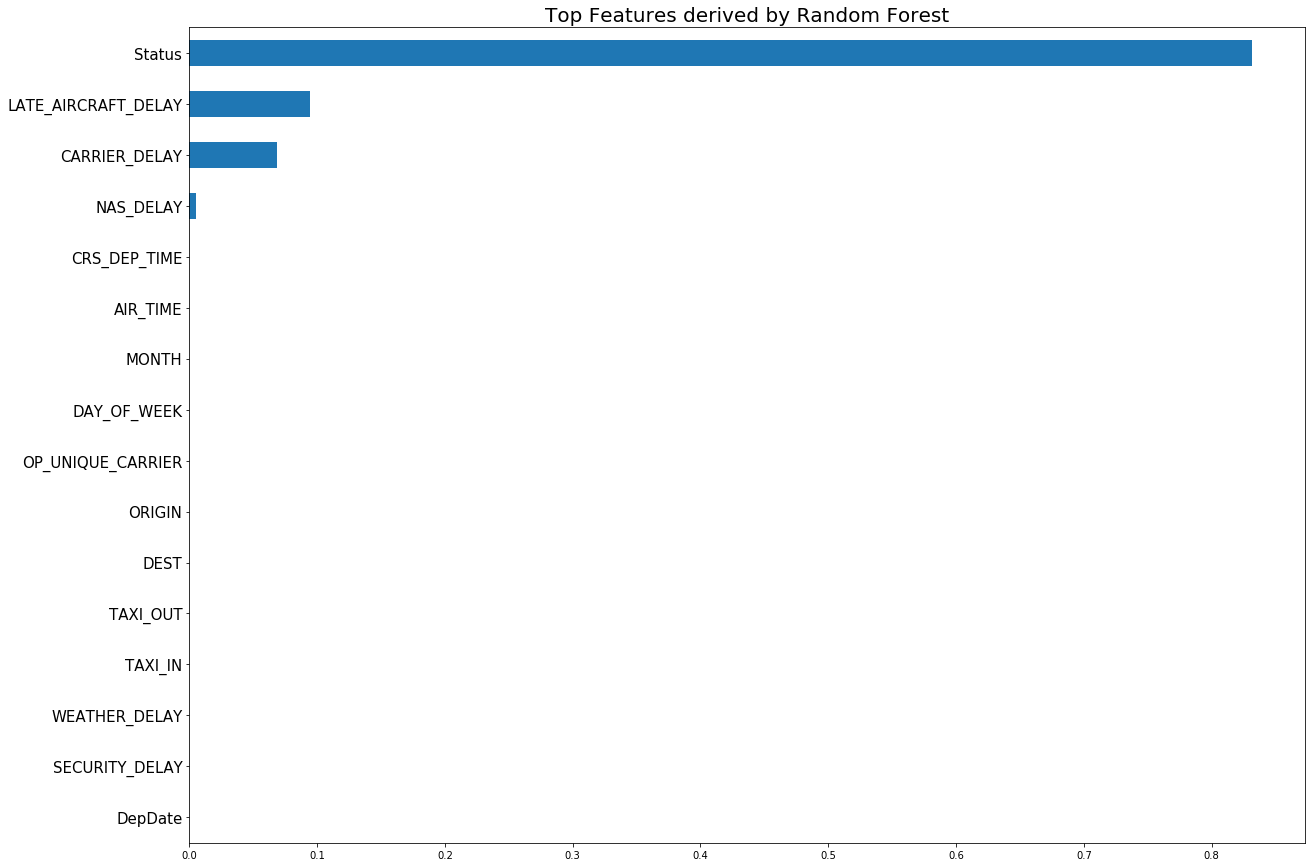

In [117]:
# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X_test2019.columns)
   .nlargest(47)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order
#sorted_importances_rf = importances_rf.sort_values()
plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

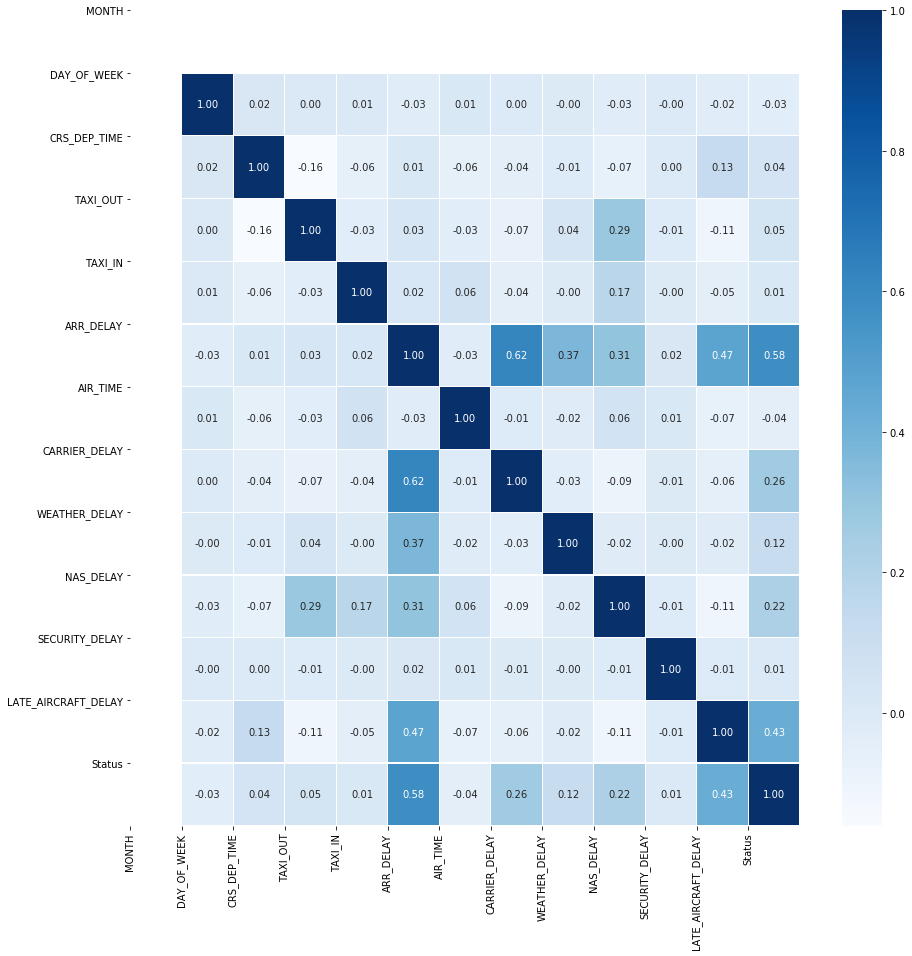

In [119]:
heatmap(data_2019)

In [120]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean_2019, sm_cv_scores_std_2019, sm_accuracy_scores_2019 = run_cross_validation_on_trees(X_train2019, y_train2019, sm_tree_depths)

C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Ahmad Abd Elhameed\AppData\Local\Continuum\anaconda3\envs\deep\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 

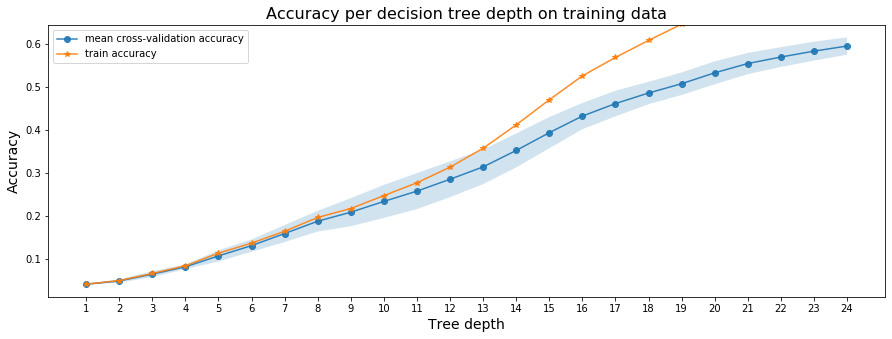

In [121]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean_2019, sm_cv_scores_std_2019, sm_accuracy_scores_2019, 
                               'Accuracy per decision tree depth on training data')

In [122]:
test_accuracy_2019 = tree_model.predict(X_test2019)

In [123]:
accuracy_score(y_test2019, test_accuracy_2019)

0.5404051900751196

In [124]:
test_accuracy_2019[0:50]

array([ 39.,  15.,  33.,  23.,  24.,  55.,  25., 106.,  46.,  42.,  15.,
        17.,  19.,  24.,  68.,  42.,  15.,  15.,  60.,  29.,  74.,  49.,
       126., 136.,  24.,  15.,  96.,  43.,  21.,  35.,  60.,  15.,  51.,
        60.,  24.,  15.,  60., 164., 856.,  24., 211.,  20.,  53.,  20.,
        42.,  34.,  35.,  39.,  60.,  24.])

In [125]:
y_test2019[0:50]

107992    39
114494    16
78177     33
50323     23
100020    24
106020    55
65392     25
1989     103
92097     46
54808     44
99864     19
88657     17
115620    19
15702     24
21192     68
1274      42
21346     23
53895     19
40373     60
28449     29
16089     95
29814     49
80956    119
35990    215
90843     24
2601      16
22895    124
40752     42
43280     26
94306     35
116234    61
15341     16
16822     58
20027     60
108065    24
51439     23
116638    90
112969   184
52237    400
61320     24
116372   234
12000     20
33588     54
43071     20
28789     40
78670     34
115210    35
69376     58
64948     63
115502    27
Name: ARR_DELAY, dtype: float64

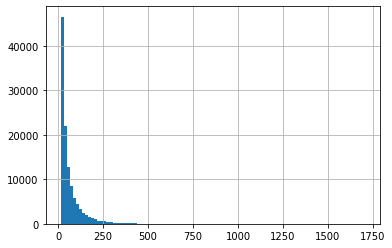

In [127]:
y_2019.hist(bins=100)

In [128]:
bagging = BaggingClassifier(SVC(),n_estimators=30,random_state=0)

In [130]:
bagging.fit(X_train2019,y_train2019)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=30, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [131]:
pred_2019 = bagging.predict(X_test2019)

In [133]:
pred_2019[0:10]

array([15., 15., 16., 16., 15., 15., 15., 44., 16., 15.])

In [134]:
y_test2019[0:10]

107992    39
114494    16
78177     33
50323     23
100020    24
106020    55
65392     25
1989     103
92097     46
54808     44
Name: ARR_DELAY, dtype: float64

In [132]:
accuracy_score(y_test2019, pred_2019)

0.03371841566127931

## Explanation
The correlation matrix identifies three main variables for delays: NAS Delay , Carrier Delay , Late Aircraft Delay,weather delay and status . The graph corroborates this assumption, showing how those five variables create most of delays during the year. the DecisionTree classifier give us about 54% accuracy which is worse than before and i check the prediction of time ,i found the difference between real and predicted time delay in few minutes execpt the delays which is very big (hours) the classifier could predict it with a very low accuracy than before .